<a href="https://colab.research.google.com/github/ian-byrne/MADSmilestone2/blob/main/Labeling/Cleaning_labeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Clone Repository and Load in Rounds Data
---



In [ ]:
# Clone the entire repo.
!git clone -l -s https://github.com/ian-byrne/MADSmilestone2.git

# Change directory into cloned repo
%cd MADSmilestone2

# List repo contents
!ls

In [ ]:
#!rm -rf /content/MADSmilestone2/MADSmilestone2/MADSmilestone2

In [ ]:
import pandas as pd
import numpy as np
import clean_rounds as cr
import Labeling.label_data as ld
import matplotlib.pyplot as plt



# Load Rounds data
rounds = pd.read_csv('round_data.csv')
rounds

,spid,cg1dclkdraw,hc1disescn9,round
0,10000003.0,3 Mildly distorted depiction of a clock,2 NO,1
1,10000004.0,3 Mildly distorted depiction of a clock,2 NO,1
2,10000005.0,3 Mildly distorted depiction of a clock,2 NO,1
3,10000006.0,4 Reasonably accurate depiction of a clock,2 NO,1
4,10000007.0,-2 Proxy says cannot ask SP,2 NO,1
...,...,...,...,...
25851,10000493.0,-2 Proxy says cannot ask SP,7 PREVIOUSLY REPORTED,4
25852,10004106.0,4 Reasonably accurate depiction of a clock,2 NO,4
25853,10007223.0,3 Mildly distorted depiction of a clock,2 NO,4
25854,10011759.0,-1 Inapplicable,-9 Missing,4


###Check values for columns of interest
- we used the user guide to determine which columns are required

In [ ]:
print("Column values for clock scores: \n", rounds['cg1dclkdraw'].unique())
print("\nHealth score values: \n", rounds['hc1disescn9'].unique())
print("\nVariable types: \n", rounds.dtypes)
rounds[rounds['cg1dclkdraw'] == '-1 Inapplicable'].head()

Column values for clock scores: 
 ['3 Mildly distorted depiction of a clock'
 '4 Reasonably accurate depiction of a clock'
 '-2 Proxy says cannot ask SP'
 '2 Moderately distorted depection of a clock' '-1 Inapplicable'
 '-7 SP refused to draw clock'
 '5 Accurate depiction of a clock (circular or square)'
 '1 Severely distorted depiction of a clock'
 '-4 SP did not attempt to draw clock' '0 Not recognizable as a clock'
 '-3 Proxy says can ask SP but SP unable to answer' '-9 Missing']

Health score values: 
 [' 2 NO' '-1 Inapplicable' ' 1 YES' '-9 Missing' '-8 DK' '2 NO'
 '7 PREVIOUSLY REPORTED' '1 YES' '-7 RF']

Variable types: 
 spid           float64
cg1dclkdraw     object
hc1disescn9     object
round            int64
dtype: object


,spid,cg1dclkdraw,hc1disescn9,round
6,10000009.0,-1 Inapplicable,-1 Inapplicable,1
8,10000013.0,-1 Inapplicable,-1 Inapplicable,1
10,10000015.0,-1 Inapplicable,-1 Inapplicable,1
33,10000046.0,-1 Inapplicable,-9 Missing,1
47,10000067.0,-1 Inapplicable,-9 Missing,1


In [ ]:
# Load the cleaned dataframe
cleaned_rounds = cr.clean_data(rounds)
cleaned_rounds

,spid,cg1dclkdraw,hc1disescn9,round
0,10000003,3 Mildly distorted depiction of a clock,2.0,1
1,10000004,3 Mildly distorted depiction of a clock,2.0,1
2,10000005,3 Mildly distorted depiction of a clock,2.0,1
3,10000006,4 Reasonably accurate depiction of a clock,2.0,1
5,10000008,2 Moderately distorted depection of a clock,2.0,1
...,...,...,...,...
25849,10011980,5 Accurate depiction of a clock (circular or s...,2.0,4
25850,10003785,4 Reasonably accurate depiction of a clock,2.0,4
25852,10004106,4 Reasonably accurate depiction of a clock,2.0,4
25853,10007223,3 Mildly distorted depiction of a clock,2.0,4


In [ ]:
#Check that we only have healthscores of 1, 2, 7 and subjects that have drawn clocks
print("health score check: \n",cleaned_rounds.cg1dclkdraw.unique())
print("\n clock scores check: \n",cleaned_rounds['hc1disescn9'].unique())

health score check: 
 ['3 Mildly distorted depiction of a clock'
 '4 Reasonably accurate depiction of a clock'
 '2 Moderately distorted depection of a clock'
 '5 Accurate depiction of a clock (circular or square)'
 '1 Severely distorted depiction of a clock'
 '0 Not recognizable as a clock']

 clock scores check: 
 [2. 1. 7.]


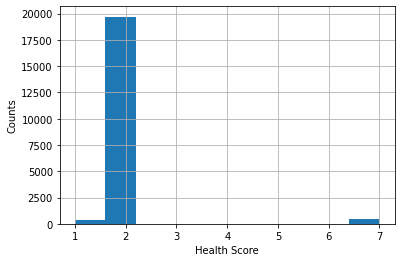

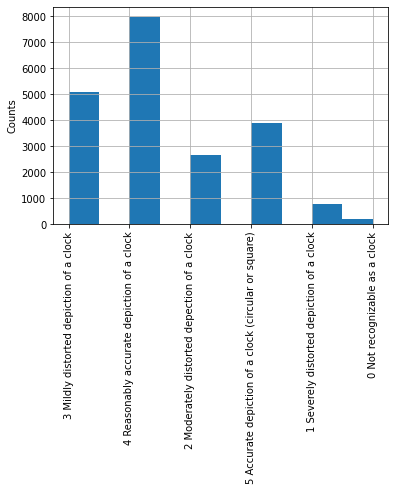

In [ ]:
# Check balance of dataset
a = cleaned_rounds.hc1disescn9.hist() 
plt.xlabel("Health Score")
plt.ylabel("Counts")
plt.show(a) 


b = cleaned_rounds.cg1dclkdraw.hist()
b.tick_params(axis='x', labelrotation = 90)
plt.ylabel("Counts")
plt.show(b)

###Create Labels for the rounds data

In [ ]:
labeled_data = ld.create_labels(cleaned_rounds)
labeled_data

,spid,cg1dclkdraw,hc1disescn9,round,label
0,10000003,3 Mildly distorted depiction of a clock,2.0,1,2
1,10000004,3 Mildly distorted depiction of a clock,2.0,1,2
2,10000005,3 Mildly distorted depiction of a clock,2.0,1,2
3,10000006,4 Reasonably accurate depiction of a clock,2.0,1,2
5,10000008,2 Moderately distorted depection of a clock,2.0,1,2
...,...,...,...,...,...
25849,10011980,5 Accurate depiction of a clock (circular or s...,2.0,4,2
25850,10003785,4 Reasonably accurate depiction of a clock,2.0,4,2
25852,10004106,4 Reasonably accurate depiction of a clock,2.0,4,2
25853,10007223,3 Mildly distorted depiction of a clock,2.0,4,2


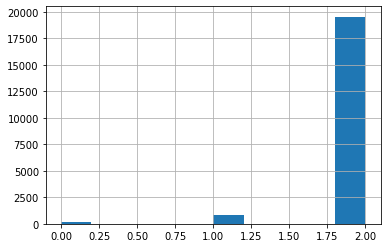

In [ ]:
# Look at distribution of labels
labeled_data.label.hist() 

### Get Individual participant IDs per round
- useful for pulling in exact images per round
- create text file to store dictionary

In [ ]:
ids = ld.get_ids(labeled_data)
ids

{1: <StringArray>
 ['10000003', '10000004', '10000005', '10000006', '10000008', '10000010',
  '10000016', '10000017', '10000019', '10000020',
  ...
  '10012395', '10012398', '10012399', '10012400', '10012401', '10012402',
  '10012406', '10012407', '10012410', '10012411']
 Length: 6913, dtype: string, 2: <StringArray>
 ['10000003', '10000007', '10000008', '10000010', '10000017', '10000019',
  '10000020', '10000021', '10000022', '10000024',
  ...
  '10012382', '10012384', '10012388', '10012394', '10012395', '10012399',
  '10012400', '10012406', '10012407', '10012411']
 Length: 5501, dtype: string, 3: <StringArray>
 ['10001875', '10005977', '10002720', '10004997', '10008945', '10012329',
  '10004064', '10001846', '10005642', '10009717',
  ...
  '10003406', '10007851', '10012277', '10002122', '10005469', '10011980',
  '10003785', '10004106', '10007223', '10011851']
 Length: 4455, dtype: string, 4: <StringArray>
 ['10001875', '10002720', '10004997', '10012329', '10004064', '10001846',
  '10

In [ ]:
# Nested Dictionary where main keys are the rounds
# contains dictionary keys 'labels' and 'spids'
# values are in a list 

#idlabel_dict = labeled_data.groupby('round')[['spid','label']].apply(lambda x: x.to_dict('list')).to_dict()
#idlabel_dict

In [ ]:
indexed_df = labeled_data[['round', 'spid','label']]
d = {}
for round, id, label in zip(indexed_df['round'].values, indexed_df['spid'].values, indexed_df['label'].values): 
  d.setdefault(round, {}).update({id:label})


{1: {'10000003': 2,
  '10000004': 2,
  '10000005': 2,
  '10000006': 2,
  '10000008': 2,
  '10000010': 1,
  '10000016': 2,
  '10000017': 2,
  '10000019': 2,
  '10000020': 2,
  '10000021': 2,
  '10000022': 2,
  '10000024': 2,
  '10000027': 2,
  '10000029': 2,
  '10000030': 2,
  '10000032': 2,
  '10000033': 2,
  '10000034': 2,
  '10000036': 2,
  '10000037': 2,
  '10000038': 2,
  '10000040': 2,
  '10000041': 2,
  '10000043': 2,
  '10000044': 2,
  '10000045': 2,
  '10000047': 0,
  '10000048': 2,
  '10000049': 2,
  '10000050': 2,
  '10000051': 1,
  '10000052': 2,
  '10000053': 2,
  '10000055': 2,
  '10000056': 2,
  '10000057': 2,
  '10000060': 2,
  '10000063': 2,
  '10000064': 2,
  '10000068': 2,
  '10000070': 2,
  '10000072': 2,
  '10000074': 2,
  '10000076': 2,
  '10000078': 2,
  '10000080': 2,
  '10000081': 2,
  '10000083': 2,
  '10000084': 2,
  '10000085': 2,
  '10000087': 2,
  '10000088': 2,
  '10000090': 2,
  '10000092': 2,
  '10000094': 2,
  '10000095': 2,
  '10000096': 2,
  '10000097

In [ ]:
idlabel_dict = labeled_data.groupby('round')[['spid','label']].apply(lambda x: x.to_dict('list')).to_dict()
idlabel_dict

{1: {'label': [2,
   2,
   2,
   2,
   2,
   1,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   0,
   2,
   2,
   2,
   1,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   1,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   0,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   1,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   1,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   1,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2